In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initialisation des categories : cars & ships
Categories = ['obj_car', 'obj_ship']
matrix_image_entrer = [] 
matrix_image_sortie = []  
#la base des image d'apprentissage
data = 'DB2C'

In [3]:
#chargement de la base de donnees des images 
for i in Categories:

    print(f'Apprentissage des images en cours : {i}')
    path = os.path.join(data, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        matrix_image_entrer.append(img_resized.flatten())
        matrix_image_sortie.append(Categories.index(i))
    print(f'chargement des images :{i}  avec succès')

Apprentissage des images en cours : obj_car
chargement des images :obj_car  avec succès
Apprentissage des images en cours : obj_ship
chargement des images :obj_ship  avec succès


In [4]:
flat_data = np.array(matrix_image_entrer)
target = np.array(matrix_image_sortie)

df = pd.DataFrame(flat_data)  
df['Target'] = target
x = df.iloc[:, :-1]  # input data
y = df.iloc[:, -1]  # output data


In [5]:
#la classification avec le medel svm 
model = svm.SVC(kernel='linear',probability=True,gamma='auto')

In [6]:
#les données sont divisées en deux catégories : les données d'entraînement et les données de test
x_entrain, x_test, y_entrain, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y)



The Model is trained well with the given images
le model est 96.93877551020408% accurate


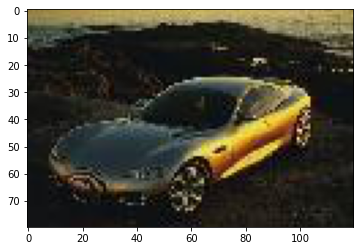

obj_car = 96.05273662351792%
obj_ship = 3.9472633764820775%
l'image choisie est  : obj_car
***************************************************


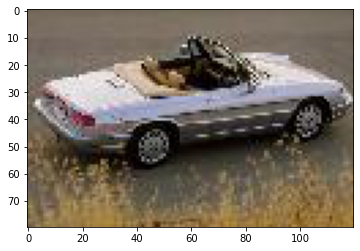

obj_car = 99.92021415664482%
obj_ship = 0.07978584335517722%
l'image choisie est  : obj_car
***************************************************


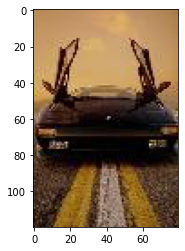

obj_car = 99.98430582245196%
obj_ship = 0.015694177548044478%
l'image choisie est  : obj_car
***************************************************


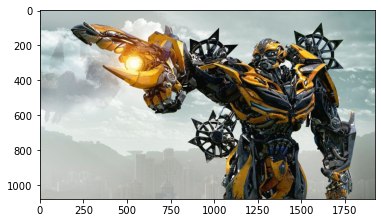

obj_car = 94.05854933149558%
obj_ship = 5.941450668504425%
l'image choisie est  : obj_car
***************************************************


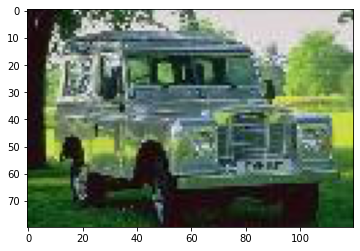

obj_car = 89.54175090488387%
obj_ship = 10.45824909511612%
l'image choisie est  : obj_car
***************************************************


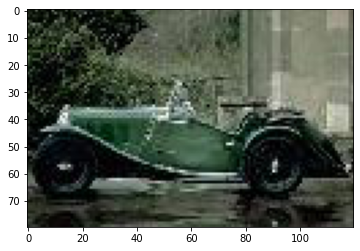

obj_car = 98.11105710879932%
obj_ship = 1.8889428912006783%
l'image choisie est  : obj_car
***************************************************


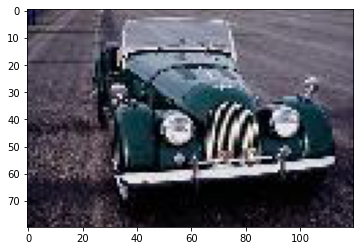

obj_car = 92.40075105519905%
obj_ship = 7.599248944800976%
l'image choisie est  : obj_car
***************************************************


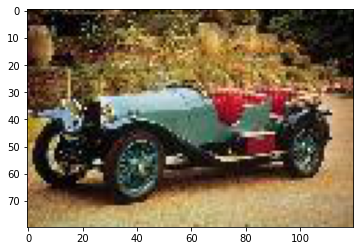

obj_car = 99.99281953927202%
obj_ship = 0.0071804607279826%
l'image choisie est  : obj_car
***************************************************


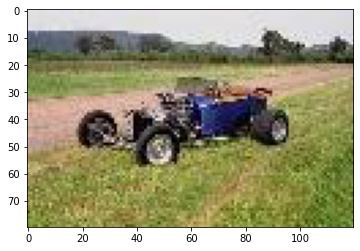

obj_car = 99.5377001613293%
obj_ship = 0.4622998386707038%
l'image choisie est  : obj_car
***************************************************


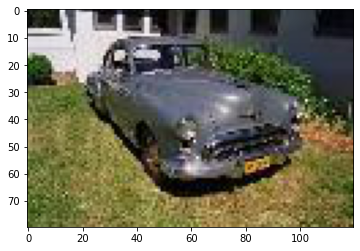

obj_car = 99.63069276199532%
obj_ship = 0.36930723800467546%
l'image choisie est  : obj_car
***************************************************


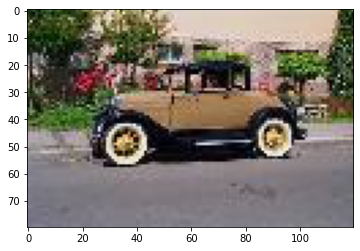

obj_car = 98.50292252791965%
obj_ship = 1.4970774720803353%
l'image choisie est  : obj_car
***************************************************


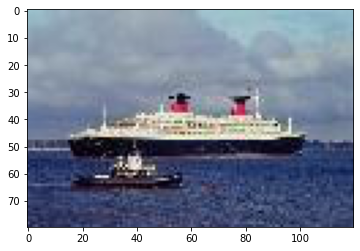

obj_car = 4.67184918852663%
obj_ship = 95.32815081147335%
l'image choisie est  : obj_ship
***************************************************


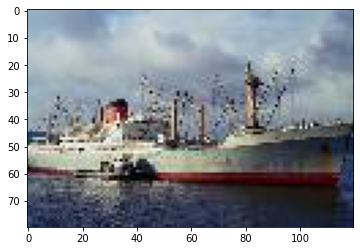

obj_car = 16.08222449818743%
obj_ship = 83.91777550181257%
l'image choisie est  : obj_ship
***************************************************


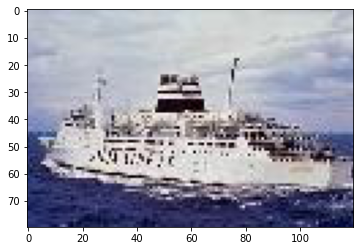

obj_car = 1.7457209837229264%
obj_ship = 98.25427901627708%
l'image choisie est  : obj_ship
***************************************************


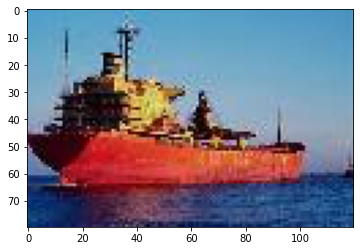

obj_car = 1.0336425159106621%
obj_ship = 98.96635748408934%
l'image choisie est  : obj_ship
***************************************************


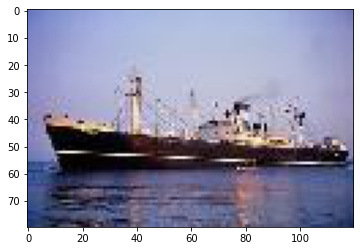

obj_car = 2.0474044751184026%
obj_ship = 97.95259552488159%
l'image choisie est  : obj_ship
***************************************************


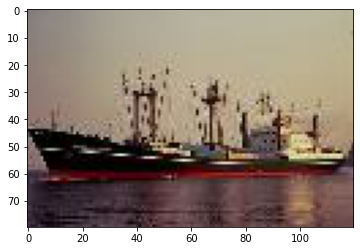

obj_car = 84.54195632565094%
obj_ship = 15.458043674349058%
l'image choisie est  : obj_car
***************************************************


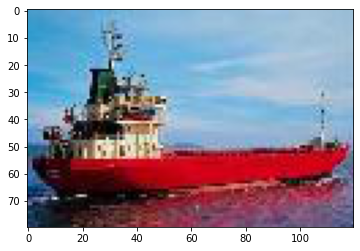

obj_car = 4.579619215203618%
obj_ship = 95.42038078479638%
l'image choisie est  : obj_ship
***************************************************


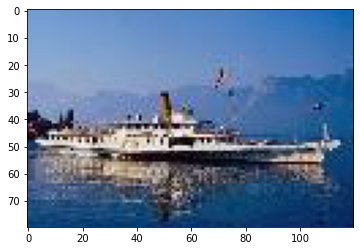

obj_car = 0.9021790102441801%
obj_ship = 99.09782098975582%
l'image choisie est  : obj_ship
***************************************************


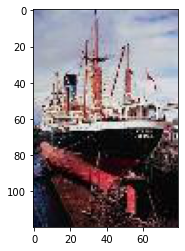

obj_car = 18.060478485474025%
obj_ship = 81.93952151452599%
l'image choisie est  : obj_ship
***************************************************


In [7]:
model.fit(x_entrain, y_entrain)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV
y_pred = model.predict(x_test)
print(f"le model est {accuracy_score(y_pred,y_test)*100}% accurate")

for i in range(1,21):
    img = imread("DataToPredict/img ("+str(i)+").jpg")
    plt.imshow(img)
    plt.show()
    img_resize = resize(img, (150, 150, 3))
    l = [img_resize.flatten()]
    probability = model.predict_proba(l)
    for ind, val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')
    print("l'image choisie est  : "+Categories[model.predict(l)[0]])
    print('***************************************************')